# Data processing script drinking water fractionation Andijk 

## 0. Introduction

The Jupyter notebook below contains python code for generating graphs used in the manuscript for the tests on drinking water conducted at Andijk together with KWR and the Vitens water utility.

A Jupyter notebook is a web-based interactive computing platform. It consists of cells that can either be text (Markdown) or lines of executable code (Python). The code can be run cell by cell and adjustments can be made to tweak the graphs. It is very useful for creating a narrative with adequate documentation in the form of text compared to sharing just code that is difficult to understand and is ideally suited to share code with others.

More information can be found at https://jupyter.org
The video series by Serena Bonaretti on YouTube are also very informative to understand what a Jupyter notebook is and can be found at https://www.youtube.com/watch?v=aIbvUDF0Pfg&list=PLj8QFvBykB7fGEH274TlqhToqGd_Qxt1H

## 1. Importing data from Zenodo and importing relevant packages

To ensure reproducibility of the code, all the data is stored in an open access repository called 'Zenodo'. More information about Zenodo can be found through following links:

https://zenodo.org/

https://www.youtube.com/watch?v=aIbvUDF0Pfg&list=PLj8QFvBykB7fGEH274TlqhToqGd_Qxt1H

The data is imported from Zenodo and is then further processed in this script to generate the figures used in the manuscript for the tests conducted at Spannenburg. 

In [1]:
! pip install wget

# if wget is not installed in your environment, the command above installs it in the correct place. 
# The '!' sign tells Jupyter to run this command in the command prompt

import wget # package to download data from zenodo

# if wget is not found (error) then install wget from the 'powershell prompt' within the Anaconda environment by typing
# 'pip install wget' in the command window, then restart the kernel of the Jupyter notebook, then it should work.

# file names and zenodo url
# there is data for tests on drinking water (DW) and groundwater (GW), these are covered in seperate scripts
# here we only generate the graphs for DW
# raw data is stored on Zenodo in the form of averages and standard deviations in UTF-8 compatible csv files
# data was gathered by KWR and reported by the KWR microbiology lab


Defaulting to user installation because normal site-packages is not writeable


In [2]:
DW_file_name_averages  = "20230830_dataset_DW_Andijk_averages.csv"
DW_file_name_stdevs = "20230830_dataset_DW_Andijk_stdevs.csv"

zenodo_url = "https://zenodo.org/record/8337506/files/" # this is the Zenodo repository where all Andijk data is stored

In [3]:
# download the files specified above from the Zenodo repository with the following lines of code

wget.download(zenodo_url + DW_file_name_averages, "./" + DW_file_name_averages) 

'./20230830_dataset_DW_Andijk_averages (1).csv'

In [4]:
wget.download(zenodo_url + DW_file_name_stdevs, "./" + DW_file_name_stdevs)

'./20230830_dataset_DW_Andijk_stdevs (1).csv'

In [5]:
# import relevant packages

import pandas as pd          # pandas for dataprocessing
import numpy as np           # numpy for numerical operations
import re                    # re for regular expression support (i.e. looking for strings in a dataset)
import os                    # operating system support (to enable code both on mac and windows)

# getting csv files from the specified folder
# double backslashes are used because a single backslash is used as an end statement in python
# file paths are different on Windows and Macintosh, therefore we use a general approach with the os module
# to access the files accross operating systems
# "/" is used on Mac whereas "\" is used on Windows as directory separator, a general directory separator can be
# used by using "os.sep", which automatically adapts to the operating system currently in use

# we use the pd.read_csv function available in pandas to import csv files into a python dataframe
# the python dataframe is stored in the local memory with two variable names (df_averages and df_stdevs)
# we can use these variable names further in the script to perform all sorts of operations on them


df_averages = pd.read_csv("./" + DW_file_name_averages, encoding = "UTF-8", sep = ';', decimal = '.')
df_stdevs = pd.read_csv("./" + DW_file_name_stdevs, encoding = "UTF-8", sep = ';', decimal = '.')


In [6]:
# after defining the variable names, we can explicitly show the python dataframes by calling the variables in the code
# after running this cell, a table appears with all data from the csv file neatly presented in a table layout
# NaN values indicate no data was measured for this specific parameter - sampling point combination

df_averages

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC,Unnamed: 15
0,MP1,0,58.1,101.5,620.8,25.27,8.54,12.86,21.40,75,758,501,9,285,1628,NaN
1,MP3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,787,500,28,285,1656,NaN
2,MP4,0,3.5,4.6,47.9,0.48,1.00,0.46,1.46,1,6,14,28,28,77,NaN
3,MP5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,1684,962,39,523,3314,NaN
4,MP6,0,3.7,8.5,109.8,0.59,4.25,22.17,26.42,33,1568,894,3,495,2993,NaN
5,MP7,0,-12.2,35.0,381.9,33.33,5.77,22.08,27.86,311,1959,978,2,531,3781,NaN
6,MP1,8,13.6,20.9,265.9,4.48,2.09,10.14,12.23,65,721,396,1,249,1432,NaN
7,MP3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,634,339,1,228,1251,NaN
8,MP4,8,0.5,2.7,32.4,0.05,1.10,0.19,1.29,1,1,8,11,24,45,NaN
9,MP5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,1164,667,14,387,2311,NaN


In [7]:
df_averages.dtypes

# this shows the datatypes in the dataset (objects, integers and floats)

# object = sampling point name (for example 'MP1')
# integer = integer numbers (for example week '0')
# float = floating numbers (for example AOC P17 value of '3.4')


Sampling point      object
Week                 int64
BP7-BP0            float64
BP7                float64
BPC14              float64
AOC A3             float64
AOC P17            float64
AOC NOX            float64
AOC total          float64
Biopolymers          int64
Humics               int64
Building blocks      int64
LMW acids            int64
LMW neutrals         int64
CDOC                 int64
Unnamed: 15        float64
dtype: object

In [8]:
df_stdevs

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC,Unnamed: 15
0,MP1,0,13.1,13.0,20.8,0.63,1.95,1.30,1.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MP3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MP4,0,0.7,0.6,2.0,0.63,0.06,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MP5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MP6,0,0.7,0.7,2.2,0.22,2.04,1.02,1.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MP7,0,8.1,8.1,4.6,3.85,0.80,1.45,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MP1,8,1.8,1.8,26.5,1.19,0.03,0.75,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MP3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MP4,8,0.2,0.1,6.0,0.00,0.40,0.10,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MP5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_stdevs.dtypes

Sampling point      object
Week                 int64
BP7-BP0            float64
BP7                float64
BPC14              float64
AOC A3             float64
AOC P17            float64
AOC NOX            float64
AOC total          float64
Biopolymers        float64
Humics             float64
Building blocks    float64
LMW acids          float64
LMW neutrals       float64
CDOC               float64
Unnamed: 15        float64
dtype: object

# 2. Chemical analysis
## 2.1 LC-OCD

The recorded LC-OCD datapoints are converted into graphs.

In [10]:
# matplotlib is a package in python used for plotting figures

import matplotlib.pyplot as plt

In [11]:
# figures can be directly exported to a local folder on your computer
# go to the desired folder in your file explorer and copy the directory (including a backslash at the end!) into the prompt
# generated below which states 'Enter a file path:'
# the 'os' package makes sure the code works both on mac and windows
# these two operating systems define paths differently (they use different 'slashes') but the os package solves this
# you need to change this path and specify which folder you want the figures to upload to, or the code will not work
# if the path exists, the function will return 'the file path exists'
# if the path does not exist, the function will return 'No such file or directory' and you will need to 
# carefully check the directory and run this cell again with the correct directory


fig_path = input('Enter a file path: ')

# e.g. C:\Users\Bob\Desktop\Data\ on Windows

# or /home/Bob/Desktop/Data/ on UNIX (mac or linux)

print(fig_path)

if os.path.exists(fig_path):
    print('The file path exists')


else:
    raise FileNotFoundError('No such file or directory')

Enter a file path: C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Manuscripts\Andijk_biostab\Images\
C:\Users\cdierend\OneDrive - UGent\Universiteit Gent\Manuscripts\Andijk_biostab\Images\
The file path exists


In [12]:
fig_path

'C:\\Users\\cdierend\\OneDrive - UGent\\Universiteit Gent\\Manuscripts\\Andijk_biostab\\Images\\'

In [13]:
# We assign a unique color to each LC-OCD fraction that we use consistently throughout the paper
# We make use of a dictionary for this purpose
# A colorpalette will help us to have visually attractive colors that fit well together
# We import seaborn (another python package) that comes with some nice color palettes that we can use
# It is not necessary to use color palettes and just define each color manually using hex codes or rgb values 
# see commented out code below, simply comment out the palette code and comment in the hex/rgb code
# to comment out entire blocks of code, simply select the lines of code you want to comment out and press 'ctrl + /' button
# on the keyboard

# Color palette code

import seaborn as sns

palette_set2 = sns.color_palette("Set2", 10)

# for absolute figures (expressed as concentrations in ug/L)
                
# color_dict = {'Biopolymers':palette_set2[3], 
#               'Humics': palette_set2[0], 
#               'Building blocks':palette_set2[5], 
#               'LMW acids': palette_set2[1], 
#               'LMW neutrals': palette_set2[2]}

# # for relative figures (expressed as percentages in percent)

# color_dict_percent = {'biopolymers percent':palette_set2[3], 
#               'humics percent': palette_set2[0], 
#               'building blocks percent':palette_set2[5], 
#               'LMW acids percent': palette_set2[1], 
#               'LMW neutrals percent': palette_set2[2]}



# Manual color code (based on colors in KWR BIOSTAB report)

# Biopolymers - purple, humics - green, building blocks - gold, LMWAs - red, LMWNs - blue

color_dict = {'Biopolymers': '#7030A0', 
              'Humics': '#00B050', 
              'Building blocks': '#FFC000', 
              'LMW acids': '#FF0000', 
              'LMW neutrals': '#1E83CA'}

color_dict_percent = {'biopolymers percent': '#7030A0', 
              'humics percent': '#00B050', 
              'building blocks percent': '#FFC000', 
              'LMW acids percent': '#FF0000', 
              'LMW neutrals percent': '#1E83CA'}


In [14]:
# We make a copy of the dataframe only containing the LC-OCD data for the relevant sampling points:
# MP1, MP4, MP6 and MP7

df_OC = df_averages[["Sampling point","Week","Biopolymers", "Humics", "Building blocks", "LMW acids", "LMW neutrals", "CDOC"]].copy()
df_OC['Week'] = pd.to_numeric(df_OC['Week'])
df_OC

,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC
0,MP1,0,75,758,501,9,285,1628
1,MP3,0,56,787,500,28,285,1656
2,MP4,0,1,6,14,28,28,77
3,MP5,0,106,1684,962,39,523,3314
4,MP6,0,33,1568,894,3,495,2993
5,MP7,0,311,1959,978,2,531,3781
6,MP1,8,65,721,396,1,249,1432
7,MP3,8,49,634,339,1,228,1251
8,MP4,8,1,1,8,11,24,45
9,MP5,8,79,1164,667,14,387,2311


In [15]:
df_OC.dtypes

Sampling point     object
Week                int64
Biopolymers         int64
Humics              int64
Building blocks     int64
LMW acids           int64
LMW neutrals        int64
CDOC                int64
dtype: object

In [16]:
df_OC_fractions = df_OC.loc[df_OC['Sampling point'].isin(["MP1","MP3", "MP4", "MP6", "MP7"])]
df_OC_fractions

,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC
0,MP1,0,75,758,501,9,285,1628
1,MP3,0,56,787,500,28,285,1656
2,MP4,0,1,6,14,28,28,77
4,MP6,0,33,1568,894,3,495,2993
5,MP7,0,311,1959,978,2,531,3781
6,MP1,8,65,721,396,1,249,1432
7,MP3,8,49,634,339,1,228,1251
8,MP4,8,1,1,8,11,24,45
10,MP6,8,17,932,529,13,335,1826
11,MP7,8,210,1119,573,9,368,2279


In [17]:
# next we rename the MPs (in Dutch) to something more suitable for an article (in English) using a dictionary

fraction_dict = {'MP1': 'DW', 
                 'MP3': 'µ-DW',
                 'MP4': 'LMW', 
                 'MP6': 'MMW', 
                 'MP7': 'HMW'}

df_OC_fractions_graph = df_OC_fractions.replace({"Sampling point": fraction_dict})
df_OC_fractions_graph = df_OC_fractions_graph.reset_index(drop=True)
df_OC_fractions_graph

# resetting the index is required to ensure the axin references the correct value inside the zoomed in box

#df_OC_fractions['fraction'] = df_OC_fractions['fraction'].replace({'MP1': 'DW', 'MP4': 'LMW', 'MP6': 'MMW', 'MP7': 'HMW'})


,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC
0,DW,0,75,758,501,9,285,1628
1,µ-DW,0,56,787,500,28,285,1656
2,LMW,0,1,6,14,28,28,77
3,MMW,0,33,1568,894,3,495,2993
4,HMW,0,311,1959,978,2,531,3781
5,DW,8,65,721,396,1,249,1432
6,µ-DW,8,49,634,339,1,228,1251
7,LMW,8,1,1,8,11,24,45
8,MMW,8,17,932,529,13,335,1826
9,HMW,8,210,1119,573,9,368,2279


<function matplotlib.pyplot.show(close=None, block=None)>

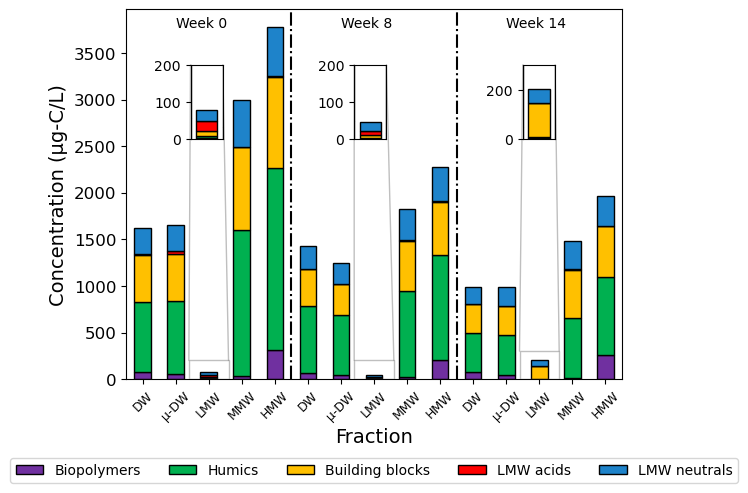

In [19]:
axis = df_OC_fractions_graph.plot.bar(x="Sampling point", 
                               y = ["Biopolymers", "Humics", "Building blocks", "LMW acids", "LMW neutrals"], 
                               stacked = True, 
                               edgecolor = "black", 
                               color = color_dict)

plt.xlabel("Fraction", fontsize = 14)
plt.ylabel("Concentration (µg-C/L)", fontsize = 14)

plt.xticks(rotation = 45, fontsize = 9)
plt.yticks(fontsize = 12)

plt.axvline(x = 4.5, color = 'black', linestyle="-.")
plt.axvline(x = 9.5, color = 'black', linestyle="-.")

plt.text(1, 3900, 'Week 0', ha='left', va='top')
plt.text(6, 3900, 'Week 8', ha='left', va='top')
plt.text(11, 3900, 'Week 14', ha='left', va='top')

# choose the legend you want (paper or KWR report)

# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.legend(bbox_to_anchor=(0.50, -0.3), loc='lower center', ncol = 5)

axin1 = axis.inset_axes([0.13, 0.65, 0.065, 0.2])

axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Biopolymers"], color = color_dict['Biopolymers'], edgecolor = "black")
axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Humics"], bottom=df_OC_fractions_graph["Biopolymers"], color = color_dict['Humics'], edgecolor = "black")
axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Building blocks"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"], color = color_dict['Building blocks'], edgecolor = "black")
axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW acids"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"], color = color_dict['LMW acids'], edgecolor = "black")
axin1.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW neutrals"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"]+df_OC_fractions_graph["LMW acids"], color = color_dict['LMW neutrals'], edgecolor = "black")

axin1.set_xlim(1.4,2.6)
axin1.set_xticks([])
axin1.set_ylim(0, 200)
axis.indicate_inset_zoom(axin1)


axin2 = axis.inset_axes([0.46, 0.65, 0.065, 0.2])

axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Biopolymers"], color = color_dict['Biopolymers'], edgecolor = "black")
axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Humics"], bottom=df_OC_fractions_graph["Biopolymers"], color = color_dict['Humics'], edgecolor = "black")
axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Building blocks"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"], color = color_dict['Building blocks'], edgecolor = "black")
axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW acids"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"], color = color_dict['LMW acids'], edgecolor = "black")
axin2.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW neutrals"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"]+df_OC_fractions_graph["LMW acids"], color = color_dict['LMW neutrals'], edgecolor = "black")


axin2.set_xlim(6.4,7.6)
axin2.set_xticks([])
axin2.set_ylim(0, 200)
axis.indicate_inset_zoom(axin2)


axin3 = axis.inset_axes([0.8, 0.65, 0.065, 0.2])

axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Biopolymers"], color = color_dict['Biopolymers'], edgecolor = "black")
axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Humics"], bottom=df_OC_fractions_graph["Biopolymers"], color = color_dict['Humics'], edgecolor = "black")
axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["Building blocks"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"], color = color_dict['Building blocks'], edgecolor = "black")
axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW acids"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"], color = color_dict['LMW acids'], edgecolor = "black")
axin3.bar(df_OC_fractions_graph.index, df_OC_fractions_graph["LMW neutrals"], bottom=df_OC_fractions_graph["Biopolymers"]+df_OC_fractions_graph["Humics"]+df_OC_fractions_graph["Building blocks"]+df_OC_fractions_graph["LMW acids"], color = color_dict['LMW neutrals'], edgecolor = "black")


axin3.set_xlim(11.4,12.6)
axin3.set_xticks([])
axin3.set_ylim(0, 300)
axis.indicate_inset_zoom(axin3)


plt.show

# comment out the line below to check if the figure looks okay
# once you have dialed in the figure and it is perfect, uncomment the line below and run this cell
# then the figure will be exported to the figure path defined above

# plt.savefig(fig_path + 'DW_LCOCD_absolute.png', dpi=200, bbox_inches='tight')

In [20]:
# next we make a 100% stacked chart, also called a 'relative' chart, with fraction expressed as perecentages of the total CDOC

In [21]:
df_OC_fractions_graph

,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC
0,DW,0,75,758,501,9,285,1628
1,µ-DW,0,56,787,500,28,285,1656
2,LMW,0,1,6,14,28,28,77
3,MMW,0,33,1568,894,3,495,2993
4,HMW,0,311,1959,978,2,531,3781
5,DW,8,65,721,396,1,249,1432
6,µ-DW,8,49,634,339,1,228,1251
7,LMW,8,1,1,8,11,24,45
8,MMW,8,17,932,529,13,335,1826
9,HMW,8,210,1119,573,9,368,2279


In [22]:
df_OC_fractions_graph["biopolymers percent"] = ((df_OC_fractions_graph["Biopolymers"]/df_OC_fractions_graph["CDOC"])*100)
df_OC_fractions_graph["humics percent"] = ((df_OC_fractions_graph["Humics"]/df_OC_fractions_graph["CDOC"])*100)
df_OC_fractions_graph["building blocks percent"] = ((df_OC_fractions_graph["Building blocks"]/df_OC_fractions_graph["CDOC"])*100)
df_OC_fractions_graph["LMW acids percent"] = ((df_OC_fractions_graph["LMW acids"]/df_OC_fractions_graph["CDOC"])*100)
df_OC_fractions_graph["LMW neutrals percent"] = ((df_OC_fractions_graph["LMW neutrals"]/df_OC_fractions_graph["CDOC"])*100)

df_OC_fractions_graph

,Sampling point,Week,Biopolymers,Humics,Building blocks,LMW acids,LMW neutrals,CDOC,biopolymers percent,humics percent,building blocks percent,LMW acids percent,LMW neutrals percent
0,DW,0,75,758,501,9,285,1628,4.606880,46.560197,30.773956,0.552826,17.506143
1,µ-DW,0,56,787,500,28,285,1656,3.381643,47.524155,30.193237,1.690821,17.210145
2,LMW,0,1,6,14,28,28,77,1.298701,7.792208,18.181818,36.363636,36.363636
3,MMW,0,33,1568,894,3,495,2993,1.102573,52.388907,29.869696,0.100234,16.538590
4,HMW,0,311,1959,978,2,531,3781,8.225337,51.811690,25.866173,0.052896,14.043904
5,DW,8,65,721,396,1,249,1432,4.539106,50.349162,27.653631,0.069832,17.388268
6,µ-DW,8,49,634,339,1,228,1251,3.916867,50.679456,27.098321,0.079936,18.225420
7,LMW,8,1,1,8,11,24,45,2.222222,2.222222,17.777778,24.444444,53.333333
8,MMW,8,17,932,529,13,335,1826,0.930997,51.040526,28.970427,0.711939,18.346112
9,HMW,8,210,1119,573,9,368,2279,9.214568,49.100483,25.142606,0.394910,16.147433


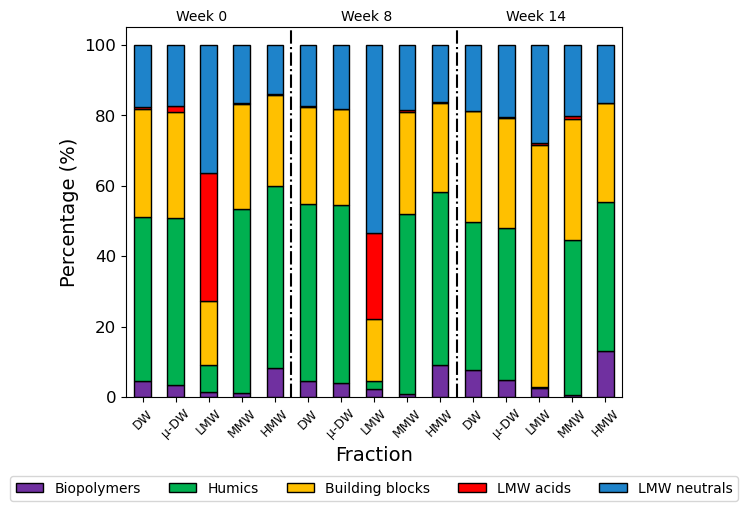

In [24]:
axis = df_OC_fractions_graph.plot.bar(x="Sampling point", 
                               y = ["biopolymers percent", "humics percent", "building blocks percent", "LMW acids percent", "LMW neutrals percent"], 
                               stacked = True, 
                               edgecolor = "black", 
                               color = color_dict_percent)

plt.xlabel("Fraction", fontsize = 14)
plt.ylabel("Percentage (%)", fontsize = 14)

plt.xticks(rotation = 45, fontsize = 9)
plt.yticks(fontsize = 12)

# plt.legend(['Biopolymers', 'Humics', 'Building blocks', 'LMW acids', 'LMW neutrals'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.legend(['Biopolymers', 'Humics', 'Building blocks', 'LMW acids', 'LMW neutrals'], bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol = 5)


plt.axvline(x = 4.5, color = 'black', linestyle="-.")
plt.axvline(x = 9.5, color = 'black', linestyle="-.")

plt.text(1, 110, 'Week 0', ha='left', va='top')
plt.text(6, 110, 'Week 8', ha='left', va='top')
plt.text(11, 110, 'Week 14', ha='left', va='top')


plt.show()

# plt.savefig(fig_path + 'DW_LCOCD_relative.png', dpi=200, bbox_inches='tight')

# 3. Biological analysis

Next, we make the figures for the biological parameters (AOC, BPP).

## 3.1 Averages

In [25]:
# We make a copy of the dataframe only containing the biological data averages for the relevant sampling points:
# MP1, MP3, MP4, MP6 and MP7
# all weeks were analyzed for biological data

df_bio_average = df_averages[["Sampling point","Week","BP7-BP0", "BP7", "BPC14", "AOC A3", "AOC P17", "AOC NOX", "AOC total"]].copy()
df_bio_average['Week'] = pd.to_numeric(df_bio_average['Week'])
df_bio_average

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,MP1,0,58.1,101.5,620.8,25.27,8.54,12.86,21.40
1,MP3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MP4,0,3.5,4.6,47.9,0.48,1.00,0.46,1.46
3,MP5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MP6,0,3.7,8.5,109.8,0.59,4.25,22.17,26.42
5,MP7,0,-12.2,35.0,381.9,33.33,5.77,22.08,27.86
6,MP1,8,13.6,20.9,265.9,4.48,2.09,10.14,12.23
7,MP3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MP4,8,0.5,2.7,32.4,0.05,1.10,0.19,1.29
9,MP5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# exclude MP5 from the dataframe for easier plotting ahead

df_bio_average_graph = df_bio_average[df_bio_average["Sampling point"].str.contains("MP5") == False]
df_bio_average_graph = df_bio_average_graph.replace({"Sampling point": fraction_dict})
df_bio_average_graph

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,DW,0,58.1,101.5,620.8,25.27,8.54,12.86,21.40
1,µ-DW,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LMW,0,3.5,4.6,47.9,0.48,1.00,0.46,1.46
4,MMW,0,3.7,8.5,109.8,0.59,4.25,22.17,26.42
5,HMW,0,-12.2,35.0,381.9,33.33,5.77,22.08,27.86
6,DW,8,13.6,20.9,265.9,4.48,2.09,10.14,12.23
7,µ-DW,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LMW,8,0.5,2.7,32.4,0.05,1.10,0.19,1.29
10,MMW,8,19.0,21.2,213.5,0.09,14.80,12.75,27.55
11,HMW,8,28.5,73.3,628.0,35.37,27.07,12.00,39.07


## 3.2 Stdevs

In [27]:
# We make a copy of the dataframe only containing the biological data stdevs for the relevant sampling points:
# MP1, MP4, MP6 and MP7
# Only week 0 was analyzed for biological data

df_bio_stdev = df_stdevs[["Sampling point","Week","BP7-BP0", "BP7", "BPC14", "AOC A3", "AOC P17", "AOC NOX", "AOC total"]].copy()
df_bio_stdev['Week'] = pd.to_numeric(df_bio_stdev['Week'])
df_bio_stdev

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,MP1,0,13.1,13.0,20.8,0.63,1.95,1.30,1.66
1,MP3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MP4,0,0.7,0.6,2.0,0.63,0.06,0.00,0.04
3,MP5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MP6,0,0.7,0.7,2.2,0.22,2.04,1.02,1.61
5,MP7,0,8.1,8.1,4.6,3.85,0.80,1.45,1.17
6,MP1,8,1.8,1.8,26.5,1.19,0.03,0.75,0.78
7,MP3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MP4,8,0.2,0.1,6.0,0.00,0.40,0.10,0.29
9,MP5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_bio_stdev_graph = df_bio_stdev[df_bio_stdev["Sampling point"].str.contains("MP5") == False]
df_bio_stdev_graph = df_bio_stdev_graph.replace({"Sampling point": fraction_dict})
df_bio_stdev_graph

,Sampling point,Week,BP7-BP0,BP7,BPC14,AOC A3,AOC P17,AOC NOX,AOC total
0,DW,0,13.1,13.0,20.8,0.63,1.95,1.30,1.66
1,µ-DW,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LMW,0,0.7,0.6,2.0,0.63,0.06,0.00,0.04
4,MMW,0,0.7,0.7,2.2,0.22,2.04,1.02,1.61
5,HMW,0,8.1,8.1,4.6,3.85,0.80,1.45,1.17
6,DW,8,1.8,1.8,26.5,1.19,0.03,0.75,0.78
7,µ-DW,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LMW,8,0.2,0.1,6.0,0.00,0.40,0.10,0.29
10,MMW,8,2.4,2.4,2.1,0.04,1.84,0.67,1.38
11,HMW,8,3.1,2.3,14.5,0.96,2.87,0.00,2.03


In [29]:
y_error_P17 = df_bio_stdev_graph["AOC P17"]
y_error_NOX = df_bio_stdev_graph["AOC NOX"]
y_error_total = df_bio_stdev_graph["AOC total"]
y_error_A3 = df_bio_stdev_graph["AOC A3"]

## 3.3 AOC Figures
### 3.3.1 AOC P17, NOX and total

MP3 (MF permeate) was not measured in week 0 and 8, only in week 14
You can simply ignore the error as the figure is generated (but no data is plotted for MP3 (µ-DW)

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


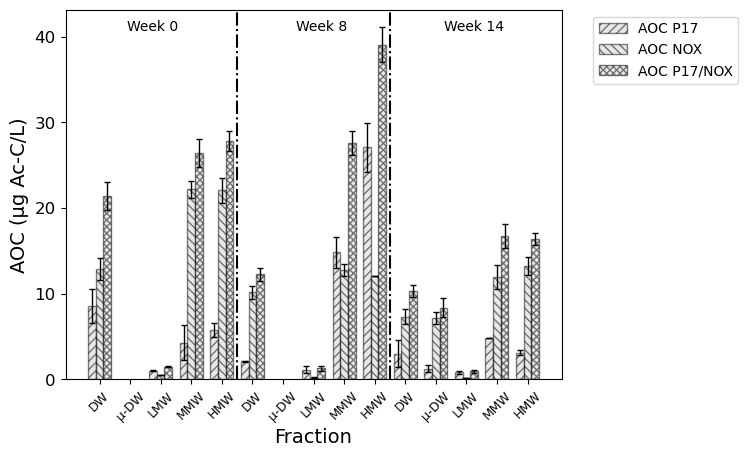

In [30]:
from matplotlib.ticker import FormatStrFormatter

labels = ['DW', 'µ-DW', 'LMW', 'MMW', 'HMW', 'DW', 'µ-DW', 'LMW', 'MMW', 'HMW', 'DW', 'µ-DW', 'LMW', 'MMW', 'HMW']

# Setting the positions and width for the bars
pos = list(range(len(df_bio_average_graph["AOC P17"])))
width = 0.25 # the width of a bar

# Plotting the bars
fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_graph["AOC P17"], width,
             alpha=0.5,
             color='lightgrey',
             hatch='////',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_P17,
             error_kw = dict(lw=1, capsize=2, capthick=1))

plt.bar([p + width for p in pos], df_bio_average_graph["AOC NOX"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='\\\\\\\\',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_NOX,
        error_kw = dict(lw=1, capsize=2, capthick=1))

plt.bar([p + width*2 for p in pos], df_bio_average_graph["AOC total"], width,
        alpha=0.5,
        color='lightgrey',
        hatch='xxxxx',
        label=labels[2],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_total,
        error_kw = dict(lw=1, capsize=2, capthick=1))

# Setting axis labels and ticks
ax.set_ylabel('AOC (µg Ac-C/L)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 1 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 9, rotation = 45)
plt.yticks(fontsize = 12)


# Fixing the decimals in the y-axis
plt.locator_params(axis='y', nbins=5)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Adding the legend before the vlines, otherwise the vlines end up in the legend
plt.legend(['AOC P17', 'AOC NOX', 'AOC P17/NOX'], bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding the lines and textboxes

plt.axvline(x = 4.75, color = 'black', linestyle="-.")
plt.axvline(x = 9.75, color = 'black', linestyle="-.")

plt.text(2, 42, 'Week 0', ha='center', va='top')
plt.text(7.5, 42, 'Week 8', ha='center', va='top')
plt.text(12.5, 42, 'Week 14', ha='center', va='top')

# Showing or saving the plot

plt.show()

# plt.savefig(fig_path + 'DW_AOC_P17_NOX_TOTAL.png', dpi=200, bbox_inches='tight')


### 3.3.2 AOC A3 and total

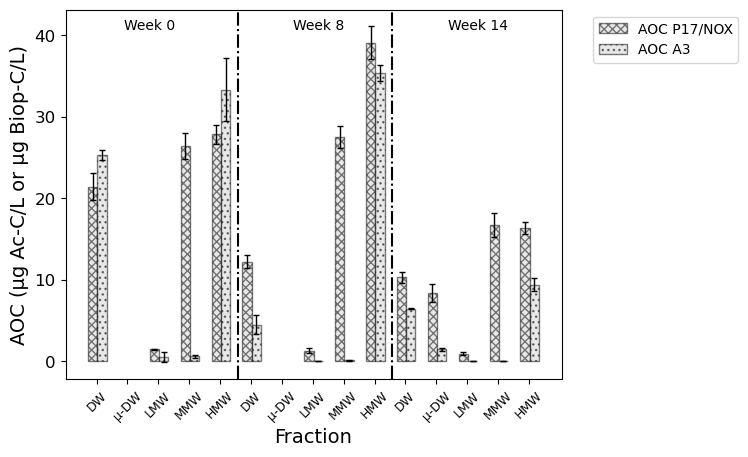

In [31]:
width_a3 = 0.3

fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_graph["AOC total"], width_a3,
             alpha=0.5,
             color='lightgrey',
             hatch='xxxx',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_total,
             error_kw = dict(lw=1, capsize=2, capthick=1))

plt.bar([p + width_a3 for p in pos], df_bio_average_graph["AOC A3"], width_a3,
        alpha=0.5,
        color='lightgrey',
        hatch='...',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_A3,
        error_kw = dict(lw=1, capsize=2, capthick=1))

# Fixing the decimals in the y-axis
plt.locator_params(axis='y', nbins=5)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Setting axis labels and ticks
ax.set_ylabel('AOC (µg Ac-C/L or µg Biop-C/L)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 9, rotation = 45)
plt.yticks(fontsize = 12)

# Adding the legend and showing the plot
plt.legend(['AOC P17/NOX', 'AOC A3'],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding the lines and textboxes

plt.axvline(x = 4.7, color = 'black', linestyle="-.")
plt.axvline(x = 9.7, color = 'black', linestyle="-.")

plt.text(1, 42, 'Week 0', ha='left', va='top')
plt.text(6.5, 42, 'Week 8', ha='left', va='top')
plt.text(11.5, 42, 'Week 14', ha='left', va='top')

# Showing or saving the plot

# plt.show()

plt.savefig(fig_path + 'DW_AOC_TOTAL_A3.png', dpi=200, bbox_inches='tight')


### 3.3.3 AOC P17/NOX single graph

In [32]:
y_error_total

0     1.66
1      NaN
2     0.04
4     1.61
5     1.17
6     0.78
7      NaN
8     0.29
10    1.38
11    2.03
12    0.68
13    1.09
14    0.16
16    1.45
17    0.73
Name: AOC total, dtype: float64

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<function matplotlib.pyplot.show(close=None, block=None)>

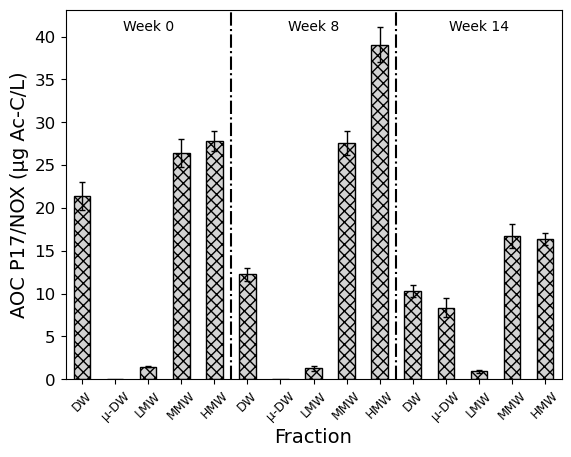

In [33]:
axis = df_bio_average_graph.plot.bar(x="Sampling point", 
                                     y = ["AOC total"], 
                                     edgecolor = "black", 
                                     color='lightgrey',
                                     ecolor = 'black',
                                     hatch = 'xxx',
                                     yerr = [y_error_total], 
                                     error_kw = dict(lw=1, capsize=2, capthick=1),)

plt.xlabel("Fraction", fontsize = 14)
plt.ylabel("AOC P17/NOX (µg Ac-C/L)", fontsize = 14)

plt.xticks(rotation = 45, fontsize = 9)
plt.yticks(fontsize = 12)

plt.legend('',frameon=False)

plt.axvline(x = 4.5, color = 'black', linestyle="-.")
plt.axvline(x = 9.5, color = 'black', linestyle="-.")

plt.text(2, 42, 'Week 0', ha='center', va='top')
plt.text(7, 42, 'Week 8', ha='center', va='top')
plt.text(12, 42, 'Week 14', ha='center', va='top')


plt.show

# plt.savefig(fig_path + 'DW_AOC_total.png', dpi=200, bbox_inches='tight')

## 3.4 BPP figures

Again, no data for MP3 (µ-DW, MF permeate) in week 0 and 8 (only week 14) with regards to BPP-values, so nothing is plotted.

In [34]:
y_error_BP7_BP0 = df_bio_stdev_graph["BP7-BP0"]
y_error_BP7 = df_bio_stdev_graph["BP7"]
y_error_BPC14 = df_bio_stdev_graph["BPC14"]

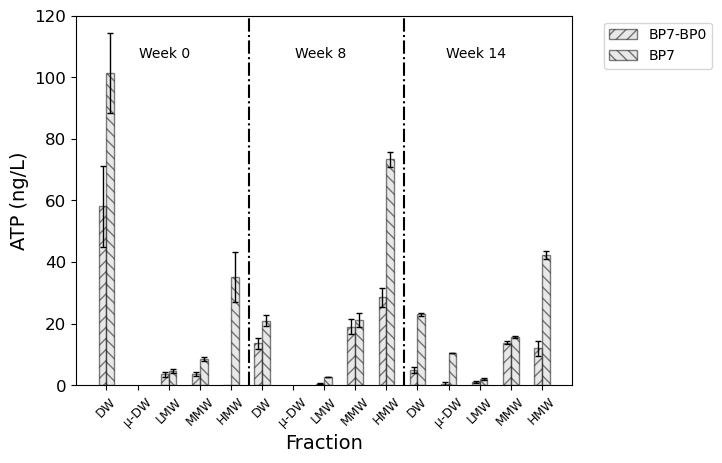

In [35]:
width_bpp = 0.25

fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_graph["BP7-BP0"], width_bpp,
             alpha=0.5,
             color='lightgrey',
             hatch='///',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_BP7_BP0,
             error_kw = dict(lw=1, capsize=2, capthick=1))

plt.bar([p + width_bpp for p in pos], df_bio_average_graph["BP7"], width_bpp,
        alpha=0.5,
        color='lightgrey',
        hatch='\\\\\\',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_BP7,
        error_kw = dict(lw=1, capsize=2, capthick=1))

# Fixing the decimals in the y-axis
# plt.locator_params(axis='y', nbins=5)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Setting axis labels and ticks
ax.set_ylabel('ATP (ng/L)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 9, rotation = 45)
plt.yticks(fontsize = 12)
plt.ylim(0,120)

# Adding the legend and showing the plot
plt.legend(['BP7-BP0', 'BP7'],bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding the lines and textboxes

plt.axvline(x = 4.7, color = 'black', linestyle="-.")
plt.axvline(x = 9.7, color = 'black', linestyle="-.")

plt.text(2, 110, 'Week 0', ha='center', va='top')
plt.text(7, 110, 'Week 8', ha='center', va='top')
plt.text(12, 110, 'Week 14', ha='center', va='top')

# Showing or saving the plot

plt.show()

# plt.savefig(fig_path + 'DW_BP7.png', dpi=200, bbox_inches='tight')


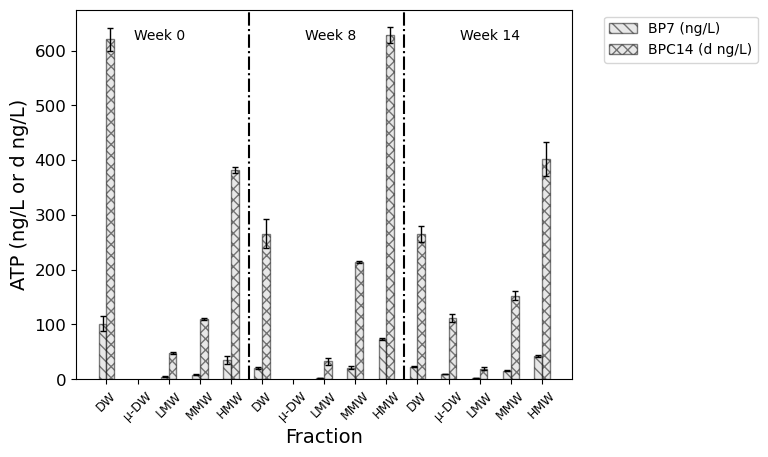

In [36]:
fig, ax = plt.subplots()

bar1=plt.bar(pos, df_bio_average_graph["BP7"], width_bpp,
             alpha=0.5,
             color='lightgrey',
             hatch='\\\\\\',
             label=labels[0],
             edgecolor='black',
             ecolor = 'black',
             yerr = y_error_BP7,
             error_kw = dict(lw=1, capsize=2, capthick=1))

plt.bar([p + width_bpp for p in pos], df_bio_average_graph["BPC14"], width_bpp,
        alpha=0.5,
        color='lightgrey',
        hatch='xxx',
        label=labels[1],
        edgecolor='black',
        ecolor = 'black',
        yerr = y_error_BPC14,
        error_kw = dict(lw=1, capsize=2, capthick=1))

# Fixing the decimals in the y-axis
# plt.locator_params(axis='y', nbins=5)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Setting axis labels and ticks
ax.set_ylabel('ATP (ng/L or d ng/L)', fontsize = 14)
ax.set_xlabel('Fraction', fontsize = 14)
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(labels, fontsize = 9, rotation = 45)
plt.yticks(fontsize = 12)
# plt.ylim(0,33)

# Adding the legend and showing the plot
plt.legend(['BP7 (ng/L)', 'BPC14 (d ng/L)'], bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding the lines and textboxes

plt.axvline(x = 4.7, color = 'black', linestyle="-.")
plt.axvline(x = 9.7, color = 'black', linestyle="-.")

plt.text(1, 640, 'Week 0', ha='left', va='top')
plt.text(6.5, 640, 'Week 8', ha='left', va='top')
plt.text(11.5, 640, 'Week 14', ha='left', va='top')

# Showing or saving the plot

plt.show()

# plt.savefig(fig_path + 'DW_BPC14.png', dpi=200, bbox_inches='tight')


# 4. Code dependencies

Below, all dependencies are printed to show which computational environment is being used in this script (for example which python version, which packages, which system, etc.). 



In [38]:
# first install the watermark package

! pip install watermark

Defaulting to user installation because normal site-packages is not writeable


In [39]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,re,os,pandas,numpy,matplotlib,seaborn,watermark

# date
print (" ")
%watermark -u -n -t -z 

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

wget      : 3.2
re        : 2.2.1
os        : unknown
pandas    : 1.4.4
numpy     : 1.21.5
matplotlib: 3.5.2
seaborn   : 0.11.2
watermark : 2.4.3

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Sep 12 2023 12:07:29Romance Daylight Time



In [40]:
! pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac